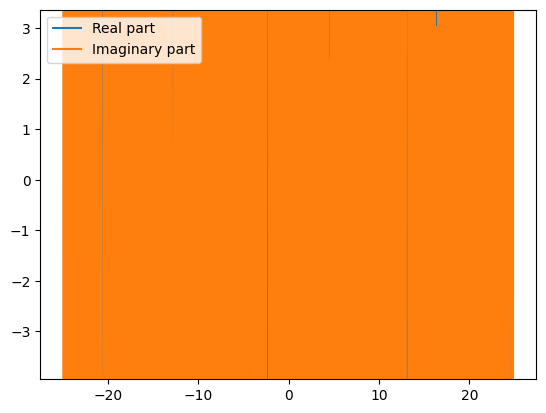

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the CGLE
alpha = 1.0  # Linear growth rate
beta = -2.0  # Nonlinear dispersion
gamma = -2.0  # Nonlinearity

# Spatial discretization
dx = 0.1
L = 50.0
x = np.arange(-L/2, L/2, dx)
N = len(x)

# Temporal discretization
dt = 0.01
T = 10.0
t = np.arange(0, T, dt)

# Initial condition
A = np.random.normal(0, 1, N) + 1j * np.random.normal(0, 1, N)

# Laplacian operator in 1D
def laplacian_1d(u):
    return (np.roll(u, -1) - 2*u + np.roll(u, 1)) / dx**2

# Function to update the field A according to the CGLE
def update(A):
    return A + dt * (alpha * A + (1 + 1j*beta) * laplacian_1d(A) - (1 + 1j*gamma) * np.abs(A)**2 * A)

# Prepare the figure
fig, ax = plt.subplots()
line1, = ax.plot(x, np.real(A), label='Real part')
line2, = ax.plot(x, np.imag(A), label='Imaginary part')
ax.legend()

# Update function for the animation
def animate(i):
    global A
    A = update(A)
    line1.set_ydata(np.real(A))
    line2.set_ydata(np.imag(A))
    return line1, line2

# Create the animation
ani = FuncAnimation(fig, animate, frames=200, interval=200, blit=True)

plt.show()